In [13]:
from numpy.random import default_rng
from matplotlib.pyplot import subplots
from numpy import zeros, fill_diagonal
from scipy.signal import find_peaks, butter, sosfilt


Using `default_rng` Generator

https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.default_rng


(3000, 3)

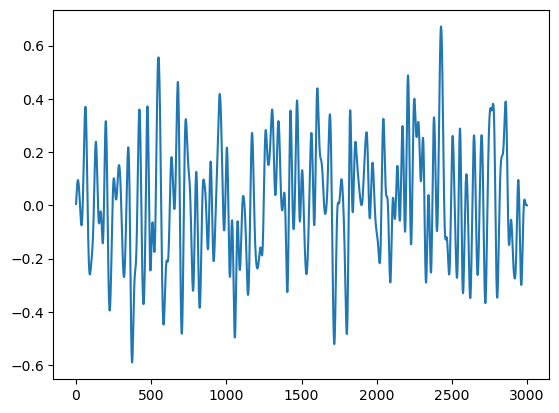

In [19]:
rows, cols = 3000, 3

random_mean = zeros(cols)

random_cov_matrix = zeros((cols, cols))

fill_diagonal(random_cov_matrix, 1)

SEED = 123

rng = default_rng(SEED)

random_data = rng.multivariate_normal(random_mean, random_cov_matrix, size=rows)

sr = 1000

order, band_low, band_high = 5, 0.01, 30

sos = butter(order, (band_low, band_high), btype='bandpass', fs=sr, output='sos')

random_data_filtered = zeros((rows, cols))

for index, column in enumerate(random_data.transpose()): 
    forward = sosfilt(sos, column)
    backwards = sosfilt(sos, forward[-1::-1])
    random_data_filtered[:, index] = backwards[-1::-1]

    
fig, ax = subplots()

ax.plot(random_data_filtered[:10000, 0]);

random_data_filtered.shape
